# Projeto #1 - Análise Exploratória de Dados

[Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

A base de dados escolhida para realização deste projeto foi a [NFL Statistics](https://www.kaggle.com/kendallgillies/nflstatistics), que contém dados de Scouts dos jogadores durante a temporada da NFL (National Football League), a liga mais famosa de Futebol Americano.
O Dataset escolhido contém dados de diversos eventos que ocorrem em uma partida do esporte (Punts, Passing, Running, Field Goal Kicks e etc), esses eventos foram agrupados em arquivos do tipo *csv* por partidas e por temporada desde 1924 até 2016.

O objetivo deste projeto é utilizar, dentre os dados da base, *Career_Stats_Passing.csv* e *Game_Logs_Quarterback.csv* para realizar uma análise exploratória do perfil de *Passing* dos Jogadores da NFL.


### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


O conjunto de dados *Career_Stats_Passing.csv* contém as seguintes informações que serão utilizados nas análises

### Identificadores
* Identificador do Jogador (variável discreta) - *Player Id*

* Ano da temporada (variável contínuo) - *Year*

* Time do Quarterback (variável discreta) - *Team*

### Features
* Número de jogos na temporada (variável contínua) - *Games Played*

* Número de tentativas de passe (variável contínua) - *Passes Attempted*

* Número de tentativas de passe (variável contínua) - *Passes Completed*

* Porcentagem de passes completos (variável contínua) - *Completion Percentage*

* Jardas ganhas por passe (variável contínua) - *Passing Yards*

* Jardas ganhas por tentativa (variável contínua) - *Passing Yards Per Attempt*

* Passes para Touchdown (variável contínua) - *TD Passes*

* Interceptações (variável contínua) - *Ints*

* Taxa de Interceptações por jogo (variável contínua) - *Int Rate*

* Número de Sacks (variável contínua) - *Sacks*

* Nota do Quarterback em passes (variável contínua) - *Passer Rating*

### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Filter features to be considered in my analysis

selected_data = ['Player Id', 'Year', 'Team', 'Games Played','Passes Attempted', 'Passing Yards Per Attempt', 
'Passes Completed', 'Completion Percentage', 'Passing Yards', 'TD Passes', 'Ints',
'Int Rate', 'Sacks', 'Passer Rating']

pass_stats = pd.read_csv('data/Career_Stats_Passing.csv')
pass_stats = pass_stats[selected_data]
pass_stats.describe()

,Year,Games Played,Passes Attempted,Passing Yards Per Attempt,Passes Completed,Completion Percentage,TD Passes,Ints,Int Rate,Sacks,Passer Rating
count,8525.000000,8525.000000,4347.000000,4239.000000,4347.000000,4239.000000,4347.000000,4347.000000,4239.000000,4347.000000,8525.000000
mean,1982.052551,10.294311,121.799172,6.663222,68.794111,46.688818,5.303658,4.989878,7.434820,7.735450,32.226111
std,23.822176,5.305723,170.226894,7.166957,102.194430,27.811635,8.289670,6.413098,16.452146,12.330431,40.485956
min,1924.000000,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1965.000000,6.000000,2.000000,3.500000,1.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,12.000000,26.000000,6.300000,11.000000,50.800000,1.000000,2.000000,3.100000,0.000000,0.000000
75%,2003.000000,15.000000,201.000000,7.500000,108.000000,60.000000,8.000000,9.000000,6.600000,12.000000,64.900000
max,2016.000000,17.000000,727.000000,81.000000,471.000000,100.000000,55.000000,35.000000,100.000000,76.000000,158.300000


In [4]:
# Filter relevant data
pass_stats = pass_stats[
    (pass_stats.Year <= 2016) &
    (pass_stats.Team != '') &
    (pass_stats['Player Id'] != None)]

In [5]:
# Format some features to type integer

int_features = ['Games Played', 'Passes Attempted', 'Sacks', 'TD Passes', 'Ints']

for col in int_features:
    pass_stats[col] = pass_stats[col].fillna(0).astype(int)


In [6]:
# Format some features to type float
float_features = ['Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt', 'Int Rate', 'Passer Rating']

for col in float_features:
    pass_stats[col] = pass_stats[col].replace(',', '', regex=True).fillna(0).astype(float)

In [7]:
# Format some features to type str
str_features = ['Team']

for col in str_features:
    pass_stats[col] = pass_stats[col].astype(str).fillna('')

### Após o processamento de dados realizado acima, minha base possui as seguintes features e seus respectivos tipo de dados:

In [8]:
pass_stats.dtypes

Player Id                     object
Year                           int64
Team                          object
Games Played                   int64
Passes Attempted               int64
Passing Yards Per Attempt    float64
Passes Completed             float64
Completion Percentage        float64
Passing Yards                float64
TD Passes                      int64
Ints                           int64
Int Rate                     float64
Sacks                          int64
Passer Rating                float64
dtype: object

In [9]:
# Normalize 'Completion Percentage' from 0 to 1
pass_stats['Completion Percentage'] = pass_stats['Completion Percentage'] / 100
pass_stats['Completion Percentage'].describe()

count    8525.000000
mean        0.232157
std         0.304889
min         0.000000
25%         0.000000
50%         0.000000
75%         0.506000
max         1.000000
Name: Completion Percentage, dtype: float64

In [10]:
# Filter data by a minimum considered values of Passes Attempted and Games Played
pass_stats = pass_stats[(pass_stats['Passes Attempted'] >= 10) & (pass_stats['Games Played'] > 5)]

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


### Quantos times já existiram na NFL?

In [11]:
len(pass_stats.Team.unique())

57

### Qual a porcentagem de Passadores que jogam mais que 12 partidas na temporada?

In [12]:
more_than_10_games = pass_stats[pass_stats['Games Played'] >= 12]

print(len(more_than_10_games) / len(pass_stats))

0.5577608142493639


### Qual a distribuição de tentativas de passes entre maior que 300 e 400 em uma temporada?

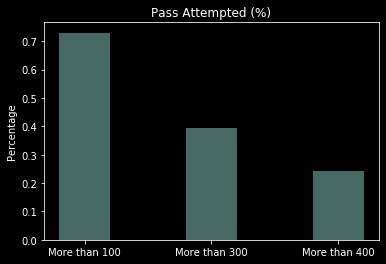

In [13]:
more_than_100_pass_att_percentage = len(pass_stats[pass_stats['Passes Attempted'] >= 100]) / len(pass_stats)
more_than_300_pass_att_percentage = len(pass_stats[pass_stats['Passes Attempted'] >= 300]) / len(pass_stats)
more_than_400_pass_att_percentage = len(pass_stats[pass_stats['Passes Attempted'] >= 400]) / len(pass_stats)

labels = ('More than 100', 'More than 300', 'More than 400')
y_pos = np.arange(len(labels))
data = [more_than_100_pass_att_percentage, more_than_300_pass_att_percentage, more_than_400_pass_att_percentage]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, labels)
plt.ylabel('Percentage')
plt.title('Pass Attempted (%)')

plt.show()

### Qual a porcentagem de Quarterbacks da história com Percentual de Acerto de Passe maior que 65%? E 70%?

In [14]:
more_than_65_completion = pass_stats[(pass_stats['Completion Percentage'] >= 0.65)]

more_than_65_completion = more_than_65_completion.sort_values('Passer Rating', ascending = False)
print(len(more_than_65_completion) / len(pass_stats))

0.07022900763358779


In [15]:
more_than_70_completion = pass_stats[(pass_stats['Completion Percentage'] >= 0.70)]

more_than_70_completion = more_than_70_completion.sort_values('Completion Percentage', ascending = False)
print(len(more_than_70_completion) / len(pass_stats))

0.008142493638676845


#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [16]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [49]:
data_analysis = pass_stats[pass_stats['Games Played'] >= 5]

In [17]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### Scatter Plot - Passer Rating x Passing Yards Per Attempted

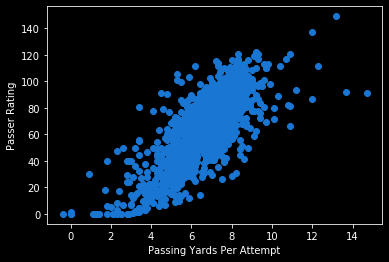

In [56]:
pass_yards_per_att = data_analysis['Passing Yards Per Attempt']
passer_rating = data_analysis['Passer Rating']


plt.scatter(pass_yards_per_att, passer_rating, color='#1976d2')
plt.xlabel('Passing Yards Per Attempt')
plt.ylabel('Passer Rating')
plt.show()

In [19]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

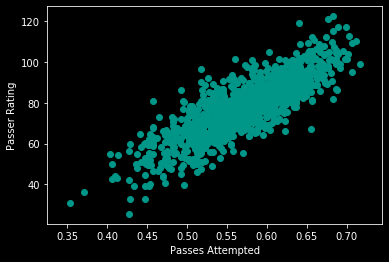

In [55]:
data = data_analysis[data_analysis['Passes Attempted'] > 200]

completion_percentages = data['Completion Percentage']
passer_rating = data['Passer Rating']


plt.scatter(completion_percentages, passer_rating, color='#009688')
plt.xlabel('Passes Attempted')
plt.ylabel('Passer Rating')
plt.show()

In [20]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

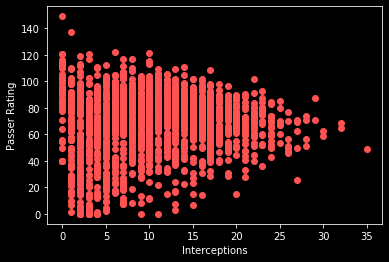

In [57]:
interceptions = data_analysis['Ints']
passer_rating = data_analysis['Passer Rating']


plt.scatter(interceptions, passer_rating, color='#ff5252')
plt.xlabel('Interceptions')
plt.ylabel('Passer Rating')
plt.show()

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

As análises realizadas acima segundo a distribuição dos Passadores que são mais bem avaliados, maiores valores de *Passer Rating*, segundo a base de dados, nos permite estabelecer o perfil dos passadores que são mais bem avaliados em relacão ao número de jardas ganhas a cada tentativa de passe bem sucedida, taxa de passes completos por tentativa, e número de interceptações por temporada. Nesta análise, esses jogadores serão referenciados como os jogadores que têm *Passer Rating* maiores que 110.

Em primeiro lugar, a análise de jardas por tentativa de passe, nos permite perceber que a maior concentração des jogadores com as maiores notas  __ganham aproximadamente 8 jardas por tentativa de passe__.

Na segunda análise, esses jogadores tem o __percentual de passes completos limitados inferiormente em 65%._

Por fim, a última análise nos mostra também que esses jogadores possuem o __número de interceptações limitados superiormente a 12 em uma temporada__.

É importante notar que o espaço amostral mínimo das análises foi para passadores que possuem pelo menos 5 partidas em uma temporada, para que não descaracterize a análise com casos esporádicos.